In [8]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
img = cv2.imread('C:/Users/LENOVO/Celebrity_Image_Recognition/model/test_image/virat1.jpg')
img.shape
# gives the (height, width, channels) for an image 3 for RGB 

(900, 1200, 3)

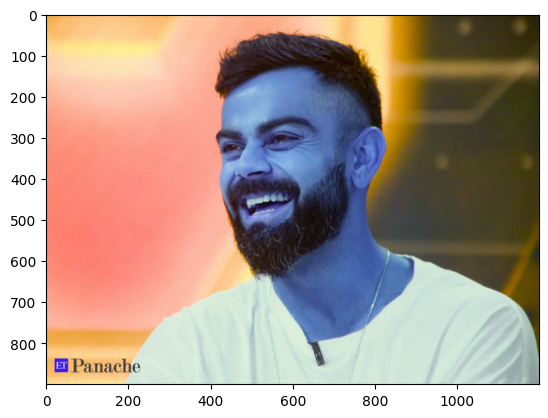

In [10]:
plt.imshow(img)

In [11]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(900, 1200)

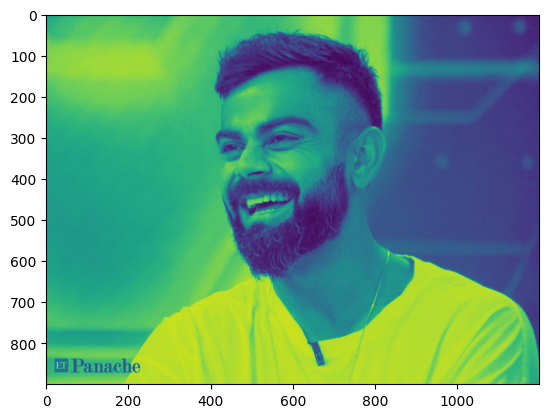

In [12]:
plt.imshow(gray)

In [13]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [49]:
import cv2

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)

     # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Image not found or unable to load - {image_path}")
        return None

    
    frame_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.equalizeHist(frame_gray)
    
    #-- Detect faces
    faces = face_cascade.detectMultiScale(frame_gray)
    
    for (x, y, w, h) in faces:
        center = (x + w // 2, y + h // 2)
        faceROI = frame_gray[y:y + h, x:x + w]
        
        #-- Detect eyes within the face ROI
        eyes = eyes_cascade.detectMultiScale(faceROI)
        
        # Check if two or more eyes are detected
        if len(eyes) >= 2:
            # Draw an ellipse around the face
            # img = cv2.ellipse(img, center, (w // 2, h // 2), 0, 0, 360, (255, 0, 255), 4)
            
            # Crop the face region
            cropped_face = img[y:y + h, x:x + w]
            
           
            
            return cropped_face
    
    print("Less than two eyes detected, returning None")
    return None



In [50]:
# Load the image
image_path = 'C:/Users/LENOVO/Celebrity_Image_Recognition/model/test_image/virat1.jpg'


if image is None:
    print("Error: Image not loaded correctly")
else:
    result = get_cropped_image_if_2_eyes(image_path)
    if result is not None:
        cv2.waitKey(0)  # Wait for a key press to close the window
    cv2.destroyAllWindows()

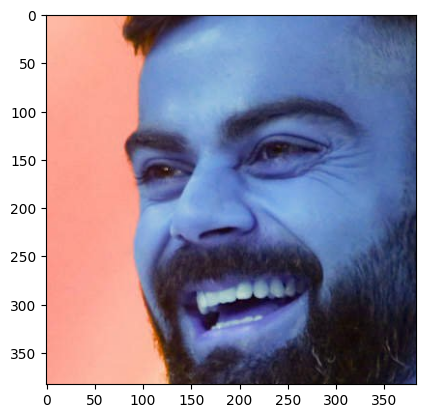

In [51]:
cropped_image = get_cropped_image_if_2_eyes(image_path)
plt.imshow(cropped_image)

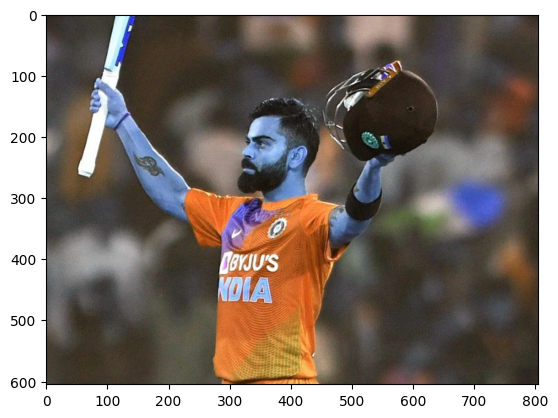

In [52]:
image_path2 = 'C:/Users/LENOVO/Celebrity_Image_Recognition/model/test_image/virat2.jpg'
image2= cv2.imread(image_path2)

# Convert the image to grayscale
frame_gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
frame_gray2 = cv2.equalizeHist(frame_gray2)

plt.imshow(image2)

In [53]:
result = get_cropped_image_if_2_eyes(image_path2)
result

Less than two eyes detected, returning None


In [54]:
path_to_image_data='C:/Users/LENOVO/Celebrity_Image_Recognition/model/images_dataset/'
path_to_cr_image_data='C:/Users/LENOVO/Celebrity_Image_Recognition/model/images_dataset/cropped/'

In [55]:
import os
img_dirs=[]
for entry in os.scandir(path_to_image_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [56]:
img_dirs

['C:/Users/LENOVO/Celebrity_Image_Recognition/model/images_dataset/cropped',
 'C:/Users/LENOVO/Celebrity_Image_Recognition/model/images_dataset/lionel_messi',
 'C:/Users/LENOVO/Celebrity_Image_Recognition/model/images_dataset/maria_sharapova',
 'C:/Users/LENOVO/Celebrity_Image_Recognition/model/images_dataset/roger_federer',
 'C:/Users/LENOVO/Celebrity_Image_Recognition/model/images_dataset/serena_williams',
 'C:/Users/LENOVO/Celebrity_Image_Recognition/model/images_dataset/virat_kohli']

In [57]:
import shutil
if os.path.exists(path_to_cr_image_data):
    shutil.rmtree(path_to_cr_image_data)
    
os.mkdir(path_to_cr_image_data)    

In [58]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_image_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1 

cropped
lionel_messi
Generating cropped images in folder:  C:/Users/LENOVO/Celebrity_Image_Recognition/model/images_dataset/cropped/lionel_messi
Less than two eyes detected, returning None
Less than two eyes detected, returning None
Less than two eyes detected, returning None
Less than two eyes detected, returning None
Less than two eyes detected, returning None
Less than two eyes detected, returning None
Less than two eyes detected, returning None
Less than two eyes detected, returning None
Less than two eyes detected, returning None
Less than two eyes detected, returning None
Less than two eyes detected, returning None
Less than two eyes detected, returning None
Less than two eyes detected, returning None
Less than two eyes detected, returning None
Less than two eyes detected, returning None
Less than two eyes detected, returning None
Less than two eyes detected, returning None
Less than two eyes detected, returning None
Less than two eyes detected, returning None
Less than two eyes 

Wavelet transform

In [59]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

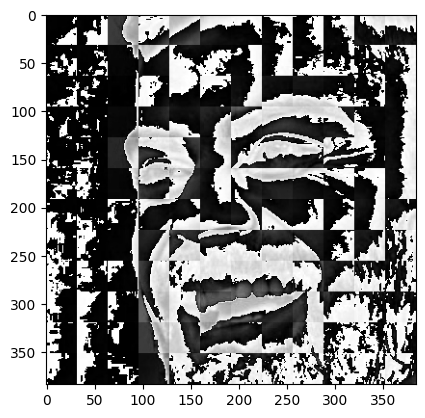

In [61]:
cropped_face_path='cropped_face.jpg'
cropped_face=cv2.imread(cropped_face_path)
im_har = w2d(cropped_face,'db1',5)
plt.imshow(im_har, cmap='gray')


You can see above a wavelet transformed image that gives clues on facial features such as 
eyes, nose, lips etc. This along with raw pixel image can be used as an input for our 
classifier.

In [63]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    if celebrity_name != "cropped":
        class_dict[celebrity_name] = count
        count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [65]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue

        
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [66]:
len(X)

158

In [67]:
X[0]

array([[ 64],
       [ 90],
       [104],
       ...,
       [117],
       [230],
       [227]], dtype=uint8)

In [68]:
len(X[0])

4096

 4096 = 32*32*3 + 32*32

In [72]:
len(y)

158

In [73]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(158, 4096)

In [74]:
X[0]

array([ 64.,  90., 104., ..., 117., 230., 227.])

Data Cleaning is done. Now we are ready to train our model


In [82]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [83]:

model_params = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [90]:
len(X_train)

118

In [85]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.805435,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.618841,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.804710,{'logisticregression__C': 1}


In [86]:
best_estimators['svm'].score(X_test,y_test)

0.875

In [87]:
best_estimators['random_forest'].score(X_test,y_test)

0.75

In [88]:
best_estimators['logistic_regression'].score(X_test,y_test)


0.875

In [91]:

best_clf = best_estimators['svm']

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 4,  0,  0,  1,  1],
       [ 0, 10,  0,  1,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  1,  0,  9,  0],
       [ 1,  0,  0,  0,  6]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

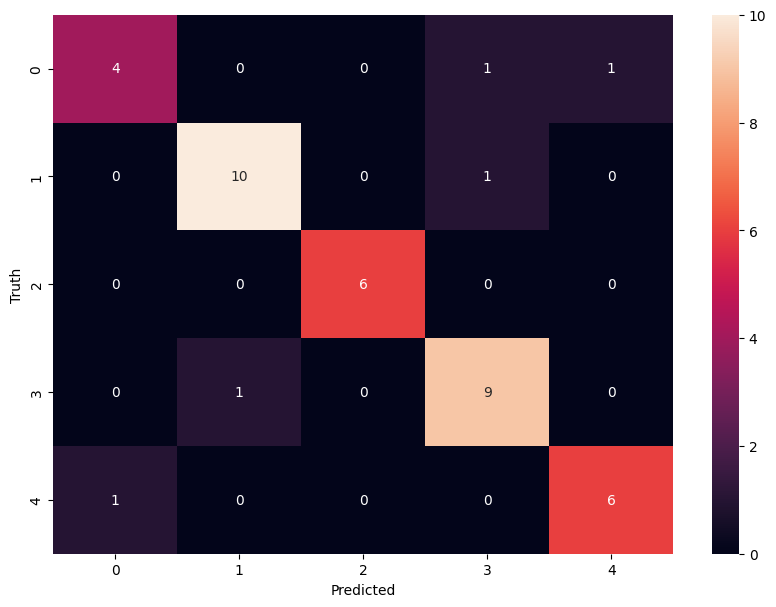

In [93]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [94]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

Save the trained model

In [95]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

Save class dictionary

In [96]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))